In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("Iris.csv")
df.head(10)

# one-hot encoding to make categorical data from species column
y = pd.get_dummies(df["Species"])
y

# drop the species and id column
x = df.drop(["Id","Species"],axis=1)
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
# split our dataset 70 to 30 ratio
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


In [4]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
88,5.6,3.0,4.1,1.3
31,5.4,3.4,1.5,0.4
9,4.9,3.1,1.5,0.1
0,5.1,3.5,1.4,0.2
32,5.2,4.1,1.5,0.1
...,...,...,...,...
22,4.6,3.6,1.0,0.2
38,4.4,3.0,1.3,0.2
53,5.5,2.3,4.0,1.3
119,6.0,2.2,5.0,1.5


In [5]:
y_train

,Iris-setosa,Iris-versicolor,Iris-virginica
88,False,True,False
31,True,False,False
9,True,False,False
0,True,False,False
32,True,False,False
...,...,...,...
22,True,False,False
38,True,False,False
53,False,True,False
119,False,False,True


In [6]:
# creating our model --> MULTILAYER PERCEPTRON

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()
model.add(Dense(6,activation="sigmoid"))  # Hidden layer
model.add(Dense(3,activation="softmax")) # Output layer

model.compile(loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,epochs= 25 , batch_size= 5)

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3886 - loss: 1.2752   
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4205 - loss: 1.1349 
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3638 - loss: 1.1926 
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3232 - loss: 1.2109 
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3637 - loss: 1.1484 
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2668 - loss: 1.1798     
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.3538 - loss: 1.1261
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.2719 - loss: 1.1302  
Epoch 9/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.3547 - loss: 1.0779
Epoch 10/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.4054 - loss: 1.0309
Epoch 11/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.2910 - loss: 1.0668
Epoch 12/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

In [9]:
score = model.evaluate(x_test,y_test)
print("ACCURACY : ",score)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7032 - loss: 0.8946  
ACCURACY :  [0.8910395503044128, 0.7111111283302307]


In [10]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
88,5.6,3.0,4.1,1.3
31,5.4,3.4,1.5,0.4
9,4.9,3.1,1.5,0.1
0,5.1,3.5,1.4,0.2
32,5.2,4.1,1.5,0.1
...,...,...,...,...
22,4.6,3.6,1.0,0.2
38,4.4,3.0,1.3,0.2
53,5.5,2.3,4.0,1.3
119,6.0,2.2,5.0,1.5


In [9]:
predict = np.array([[6.3,2.5,5.0,1.9]])
i = model.predict(predict)
i

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[0.20959473, 0.39367786, 0.39672735]], dtype=float32)

In [16]:
# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=5, validation_split=0.2)


Epoch 1/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9611 - loss: 0.3244 - val_accuracy: 1.0000 - val_loss: 0.2380
Epoch 2/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9657 - loss: 0.2826 - val_accuracy: 1.0000 - val_loss: 0.2385
Epoch 3/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9943 - loss: 0.2847 - val_accuracy: 1.0000 - val_loss: 0.2367
Epoch 4/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9611 - loss: 0.2796 - val_accuracy: 1.0000 - val_loss: 0.2368
Epoch 5/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9886 - loss: 0.2932 - val_accuracy: 1.0000 - val_loss: 0.2356
Epoch 6/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9740 - loss: 0.2491 - val_accuracy: 1.0000 - val_loss: 0.2334
Epoch 7/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9972 - loss: 0.2695 - val_accuracy: 1.0000 - val_loss: 0.2333
Epoch 8/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9864 - loss: 0.2586 - val_accuracy: 1.0000 - val_loss

In [17]:
# Evaluate the model
score = model.evaluate(x_test, y_test)
print("ACCURACY:", score)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9495 - loss: 0.2504 
ACCURACY: [0.2473309189081192, 0.9555555582046509]


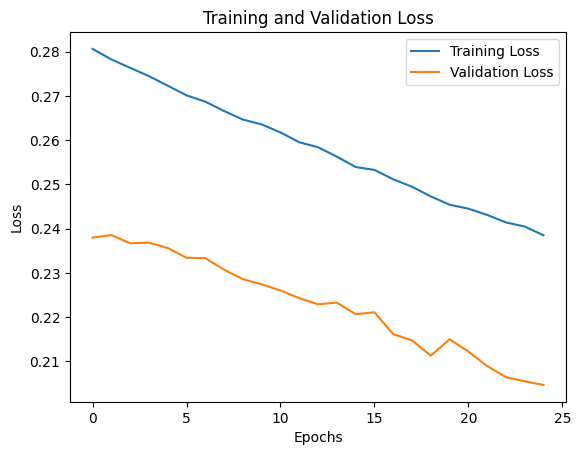

In [18]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
